# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Model](#5.4_Load_Model)
  * [5.5 Load Data](#5.5_Load_Data)
  * [5.6 Refit Model On All Available Data (excluding FL State)](#5.6_Refit_Model_On_All_Available_Data_(excluding_Fl_State))
  * [5.7 Calculate Expected Fl Average Salary From The Model](#5.7_Calculate_Expected_Big_Mountain_Ticket_Price_From_The_Model)
  * [5.8 Florida Jobs In  Market Context](#5.8_Big_Mountain_Resort_In_Market_Context)
  * [5.8.1 Average Salary](#5.8.1_Ticket_price)
  * [5.8.2 Founded Years of a Company](#5.8.2_Vertical_drop)
  * [5.8.3 Rating of Company](#5.8.3_Snow_making_area)
  * [5.8.4 Highest Revenue posibble for a Company](#5.8.4_Total_number_of_chairs)
  * [5.8.5 Maximun possible Company Size](#5.8.5_Fast_quads)
  * [5.8.6 Python knowledge](#5.8.6_Runs)
  * [5.8.7 DataBase knowledge](#5.8.7_Longest_run)
  * [5.8.8 SQL knowledge](#5.8.8_Trams)
  * [5.8.9 Math knowledge](#5.8.9_Skiable_terrain_area)
  * [5.9 Modeling scenarios](#5.9_Modeling_scenarios)
    * [5.9.1 Scenario 1](#5.9.1_Scenario_1)
    * [5.9.2 Scenario 2](#5.9.2_Scenario_2)
    * [5.9.3 Scenario 3](#5.9.3_Scenario_3)
    * [5.9.4 Scenario 4](#5.9.4_Scenario_4)
  * [5.10 Summary](#5.10_Summary)
  * [5.11 Further work](#5.11_Further_work)


## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, we now take our model for Ave_Salary it to gain some insights into .

We can now use our model to gain insight into what  change under various scenarios.

## 5.3 Imports<a id='5.3_Imports'></a>

In [442]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

## 5.4 Load Model<a id='5.4_Load_Model'></a>

In [443]:
# This isn't exactly production-grade, but a quick check for development
# These checks can save some head-scratching in development when moving from
# one python environment to another, for example
expected_model_version = '1.0'
model_path = './models/DS_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

Expected model version doesn't match version loaded


## 5.5 Load Data<a id='5.5_Load_Data'></a>

In [444]:
job_data = pd.read_csv('numer_data_step3_features.csv')

In [445]:
job_dataS=job_data.set_index('State').groupby('State').mean()

In [446]:
print(job_dataS)

                             Rating  Ave_Salary  Founded_Years  \
State                                                            
AL                         4.180000   67.150000      41.100000   
AZ                         3.336156   96.998371      24.179153   
Brentford, United Kingdom  3.900000  132.750000      21.000000   
CA                         3.552790  133.636719      21.042411   
CO                         3.790909   75.000000      60.818182   
CT                         3.385714   85.142857      26.428571   
DC                         3.260000  104.175000      18.350000   
DE                         3.543750   91.343750      48.312500   
FL                         3.461702   79.962766      26.127660   
GA                         3.666667   80.666667      17.833333   
HI                         3.300000   98.500000       0.000000   
IA                         4.100000   78.900000      26.200000   
ID                         3.933333   74.000000      32.333333   
IL        

In [447]:
job_dataS=job_dataS.reset_index()

In [448]:
#State_FL = job_dataS[job_dataS.State == 'FL']
State_FL = job_dataS[job_dataS['State'] == 'FL']

In [449]:
print(State_FL)

  State    Rating  Ave_Salary  Founded_Years  Max_Company_Size  \
8    FL  3.461702   79.962766       26.12766       2814.468085   

   Max_USD_Revenue  Python_knowledge  MatLab_knowledge  PowerBI_knowledge  \
8     1.281649e+09          0.340426          0.031915           0.117021   

   SQL_knowledge  ...  state_total_Python_x  state_total_Sql_x  \
8       0.638298  ...                  32.0               60.0   

   state_total_DataB_x  state_total_Math_x  jobs_per_state_y  \
8                 47.0                30.0              94.0   

   state_ave_salary_y  state_total_Python_y  state_total_Sql_y  \
8                77.5                  32.0               60.0   

   state_total_DataB_y  state_total_Math_y  
8                 47.0                30.0  

[1 rows x 28 columns]


## 5.6 Refit Model On All Available Data (excluding Fl State)<a id='5.6_Refit_Model_On_All_Available_Data_(excluding_Fl_State)'></a>

This next step requires some careful thought. We want to refit the model using all available data. But should we include 
Florida Sate Jobs? On the one hand, we are not trying to estimate model performance on a previously unseen data sample, 
so theoretically including Florida State data should be fine. One might first think that including Florida State  in the model 
training would, if anything, improve model performance in predicting Florida State's average salary. But here's where our
business context comes in. The motivation for this entire project is based on the sense that Florida State needs to adjust 
its salary. One way to phrase this problem: we want to train a model to predict Florida State's average salary based on data 
from all the other  States! We don't want Florida State's current salary to bias this. We want to calculate a salary based 
only on others states.

In [450]:
#X = job_dataS.loc[job_dataS.State != "FL", model.X_columns]
#y = job_dataS.loc[job_dataS.State != "FL", 'Ave_Salary']

X = job_dataS.loc[job_dataS['State'] != "FL", model.X_columns]
y = job_dataS.loc[job_dataS['State'] != "FL", 'Ave_Salary']

In [451]:
len(X), len(y)

(44, 44)

In [452]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1000, random_state=47))])

In [453]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [454]:
cv_results['test_score']

array([-12.69163266,  -6.1304093 ,  -5.74509583,  -3.67779505,
        -4.40437639])

In [455]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(6.529861843381991, 3.206082128900958)

These numbers will inevitably be different to those in the previous step that used a different training data set. They should, however, be consistent. It's important to appreciate that estimates of model performance are subject to the noise and uncertainty of data!

## 5.7 Calculate FL Average Salary From The Model<a id='5.7_Calculate_Expected_Big_Mountain_Ticket_Price_From_The_Model'></a>

In [456]:
#X_bm = job_data.loc[job_data.State == "FL", model.X_columns]
#y_bm = job_data.loc[job_data.State == "FL", 'Ave_Salary']


X_bm = job_dataS.loc[job_dataS['State'] == "FL", model.X_columns]
y_bm = job_dataS.loc[job_dataS['State'] == "FL", 'Ave_Salary']

In [457]:
print(y_bm)

8    79.962766
Name: Ave_Salary, dtype: float64


In [458]:
bm_pred = model.predict(X_bm).item()

In [459]:
y_bm = y_bm.values.item()

In [460]:
print(f'FL Ave_Salary  is ${bm_pred:.2f} K, actual Salary is ${y_bm:.2f}. K')
print(f'Even with the expected mean absolute error of ${mae_mean:.2f} K, this suggests there is posibility for an increase a litle be  a Salary.')

FL Ave_Salary  is $82.81 K, actual Salary is $79.96. K
Even with the expected mean absolute error of $6.53 K, this suggests there is posibility for an increase a litle be  a Salary.


This result should be viewed with optimism and doubt! The validity of our model lies in the assumption that other Jobs in
other states accurately set your salary based on what the market supports . But if ours is paying badly, others? It is 
reasonable to expect that some salaries are "exaggerated" and some "sub-salary". Or if the jobs in other states are pretty
good in terms of salary strategies, it could be that our model is simply missing some clue. data?

## 5.8 Florida jobs In Market Context<a id='5.8_Big_Mountain_Resort_In_Market_Context'></a>

Features that came up as important in the modeling (not just our final, random forest model) included:
* Founded_Years
* Rating
* Highest_USD_Revenue
* Max_Company_Size
* Python_knowledge
* DataB_knowledge
* SQL_knowledge
* Math_knowledge

It's often useful to define custom functions for visualizing data in meaningful ways. The function below takes a feature 
name as an input and plots a histogram of the values of that feature. It then marks where Florida State sits in the distribution
by marking Florida State value with a vertical line using `matplotlib`'s 
[axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) function. It also performs a little 
cleaning up of missing values and adds descriptive labels and a title.

In [461]:
#Code task 1#
#Add code to the `plot_compare` function that displays a vertical, dashed line
#on the histogram to indicate Florida State position in the distribution
#Hint: plt.axvline() plots a vertical line, its position for 'feature1'
#would be `State_FL['feature1'].values, we'd like a red line, which can be
#specified with c='r', a dashed linestyle is produced by ls='--',
#and it's nice to give it a slightly reduced alpha value, such as 0.8.
#Don't forget to give it a useful label (e.g. 'Fl State') so it's listed
#in the legend.
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):
    """Graphically compare distributions of features.
    
    Plot histogram of values for all states and reference line to mark
    Fl State's position.
    
    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    state - select a specific state (None for all states)
    figsize - (optional) figure size
    """
    
    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if state is None:
        ski_x = job_dataS[feat_name]
    else:
        ski_x = job_dataS.loc[job_dataS['state'] == state, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    plt.axvline(x=State_FL[feat_name].values, c='r', ls='--', alpha=0.8, label='FL')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for jobs in market share')
    plt.legend()

### 5.8.1 Average Salary<a id='5.8.1_Ticket_price'></a>

Look at where Florida amongst all States for Salary

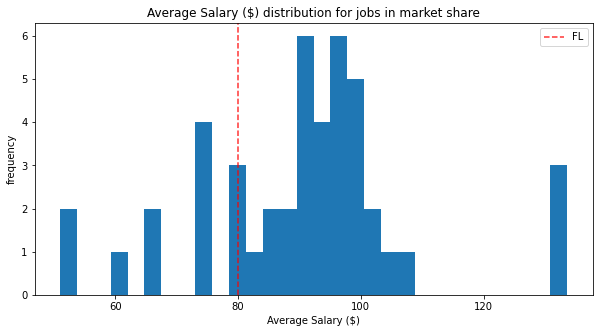

In [462]:
plot_compare('Ave_Salary', 'Average Salary ($)')

### 5.8.2 Founded Years<a id='5.8.2_Vertical_drop'></a>

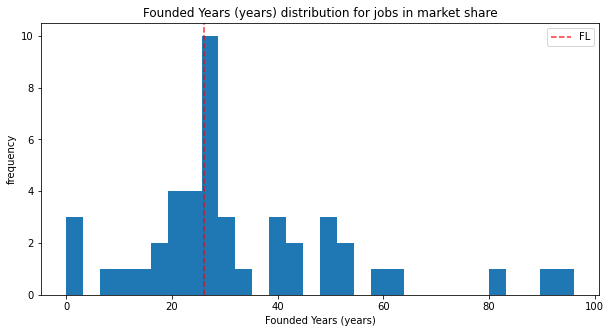

In [463]:
plot_compare('Founded_Years', 'Founded Years (years)')

### 5.8.3 Rating<a id='5.8.3_Snow_making_area'></a>

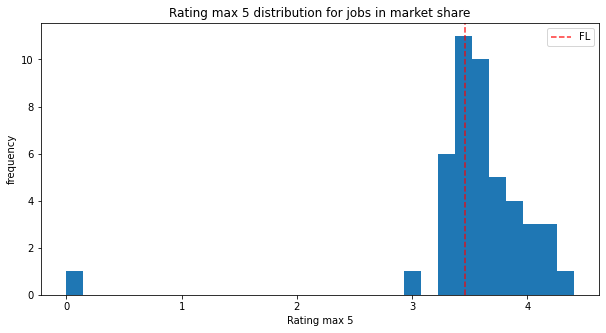

In [464]:
plot_compare('Rating', 'Rating max 5')

### 5.8.4 The Highest Revenue posibble for a Company<a id='5.8.4_Total_number_of_chairs'></a>

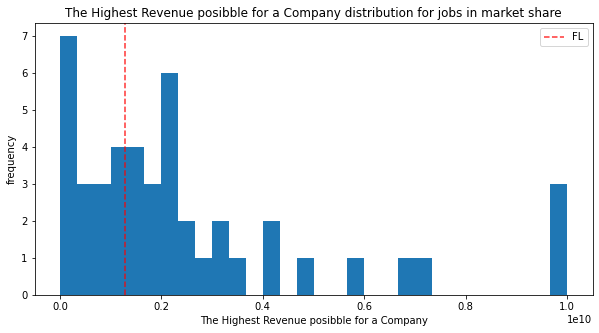

In [465]:
plot_compare('Max_USD_Revenue', 'The Highest Revenue posibble for a Company')

### 5.8.5 Maximun possible Company Size<a id='5.8.5_Fast_quads'></a>

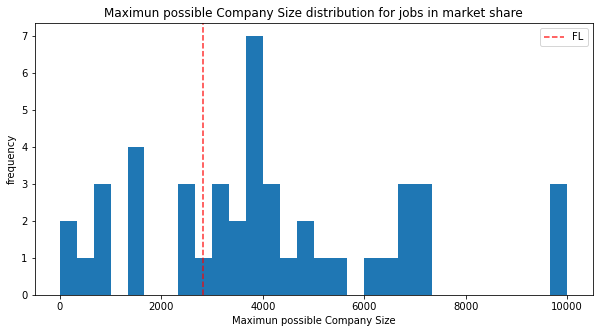

In [466]:
plot_compare('Max_Company_Size', 'Maximun possible Company Size')

### 5.8.6 Python knowledge<a id='5.8.6_Runs'></a>

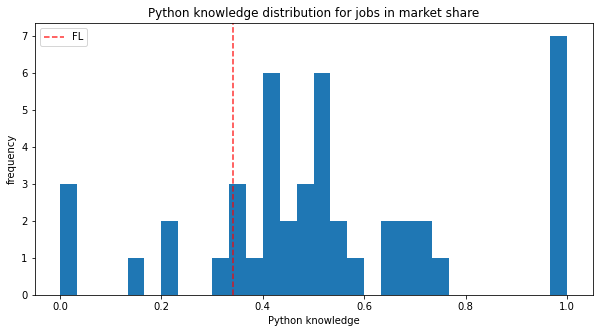

In [467]:
plot_compare('Python_knowledge', 'Python knowledge')

### 5.8.7 DataBase knowledge<a id='5.8.7_Longest_run'></a>

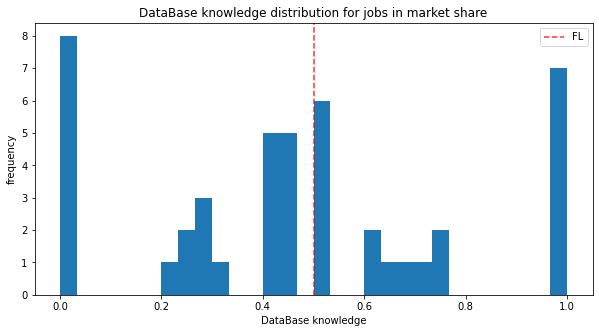

In [468]:
plot_compare('DataB_knowledge', 'DataBase knowledge')

### 5.8.8 SQL knowledge<a id='5.8.8_Trams'></a>

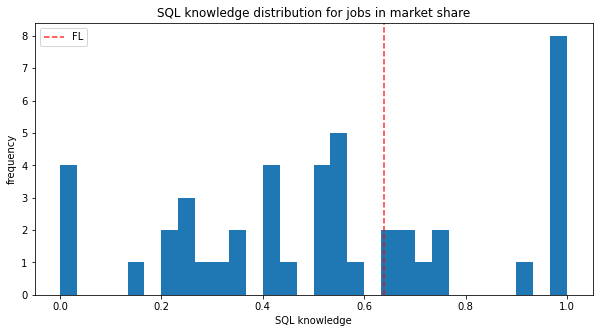

In [469]:
plot_compare('SQL_knowledge', 'SQL knowledge')

### 5.8.9 Math knowledge<a id='5.8.9_Skiable_terrain_area'></a>

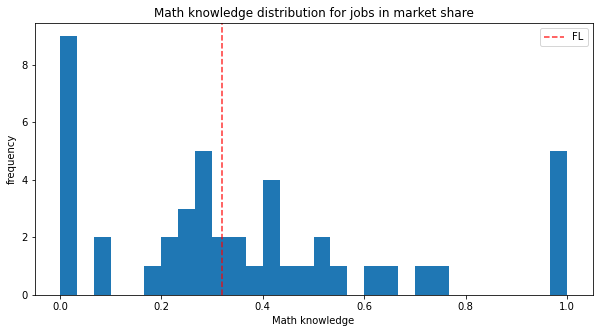

In [470]:
plot_compare('Math_knowledge', 'Math knowledge')

## 5.9 Modeling scenarios<a id='5.9_Modeling_scenarios'></a>

Florida Job Market has been reviewing potential scenarios for (starting from average salaries). the average salary is not 
determined by
any set of parameters; the company is free to set the salary it wants. However, the state operates within a market where
people pay more for certain skills and less for others. Being able to see how skills support a given average salary is valuable
business intelligence. This is where the usefulness of our model comes into play.
The expected number of jobs increases during the season is 500 on average.

In [471]:
expected_jobs = 100

In [472]:
all_feats = ['State','Founded_Years','Rating','Max_USD_Revenue','Max_Company_Size','Python_knowledge','DataB_knowledge',
             'SQL_knowledge','Math_knowledge','ETL_knowledge']
State_FL[all_feats]

,State,Founded_Years,Rating,Max_USD_Revenue,Max_Company_Size,Python_knowledge,DataB_knowledge,SQL_knowledge,Math_knowledge,ETL_knowledge
8,FL,26.12766,3.461702,1.281649e+09,2814.468085,0.340426,0.5,0.638298,0.319149,0.234043


In [473]:
#Code task 2#
#In this function, copy the Florida State data into a new data frame
#(Note we use .copy()!)
#And then for each feature, and each of its deltas (changes from the original),
#create the modified scenario dataframe (bm2) and make a average salary prediction
#for it. The difference between the scenario's prediction and the current
#prediction is then calculated and returned.
#Complete the code to increment each feature by the associated delta
def predict_increase(features, deltas):
    """Increase in modelled average salary by applying delta to feature.
    
    Arguments:
    features - list, names of the features in the job_data dataframe to change
    deltas - list, the amounts by which to increase the values of the features
    
    Outputs:
    Amount of increase in the predicted average salary
    """
    
    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[f] += d
    return model.predict(bm2).item() - model.predict(X_bm).item()

### 5.9.1 Scenario 1<a id='5.9.1_Scenario_1'></a>

 The number of Python_knowledge is the only parameter varying.

In [474]:
[i for i in range(-1, -11, -1)]

[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]

In [475]:
py_delta = [i for i in range(-1, -11, -1)]
salary_deltas = [predict_increase(['Python_knowledge'], [delta]) for delta in py_delta]

In [476]:
salary_deltas

[-0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214,
 -0.6733227838752214]

### 5.9.2 Scenario 2<a id='5.9.2_Scenario_2'></a>

In [477]:
#Code task 4#

salary2_increase = predict_increase(['Python_knowledge', 'DataB_knowledge', 'SQL_knowledge'], [80, 50,40 ])
revenue2_increase = expected_jobs * salary2_increase

In [478]:
print(f'This scenario increases support for Average Salary by ${salary2_increase:.2f}')
print(f'Over the season, this could be expected to pay to ${revenue2_increase:.0f}K')

This scenario increases support for Average Salary by $0.13
Over the season, this could be expected to pay to $13K


In [479]:
#Code task 4.1#

salary2_increase = predict_increase(['SQL_knowledge'], [1])
revenue2_increase = expected_jobs * salary2_increase

In [480]:
print(f'This scenario increases support for Average Salary by ${salary2_increase:.2f}')
print(f'Over the season, this could be expected to pay to ${revenue2_increase:.0f}K')

This scenario increases support for ticket price by $0.01
Over the season, this could be expected to pay to $1K


### 5.9.3 Scenario 3<a id='5.9.3_Scenario_3'></a>

In this scenario, you are repeating the previous one but adding 2 acres of snow making.

In [481]:
#Code task 5#

salary3_increase = predict_increase(['Python_knowledge', 'DataB_knowledge', 'SQL_knowledge', 'Math_knowledge'], [80, 50, 40,30 ])
revenue3_increase =expected_jobs * salary3_increase

In [482]:
print(f'This scenario increases support for Average Salary by ${salary3_increase:.2f}')
print(f'Over the season, this could be expected to pay to ${revenue3_increase:.0f}K')

This scenario increases support for average salary by $0.31
Over the season, this could be expected to pay to $31K


Such a small increase in the snow making area makes no difference!

### 5.9.4 Scenario 4<a id='5.9.4_Scenario_4'></a>

This scenario calls for increasing the longest run by .2 miles and guaranteeing its snow coverage by adding 4 acres of snow making capability.

In [483]:
#Code task 6#
#Predict the increase from adding ETl knowledge 500 and Math knowledge 300
predict_increase(['ETL_knowledge', 'Math_knowledge'], [30, 30])

-0.28828114047065867

## 5.10 Summary<a id='5.10_Summary'></a>

**Q: 1** Write a summary of the results of modeling these scenarios. Start by starting the current position; how much does 
    Average Salary currently change? What does your modelling suggest for a Average Salary increase that could be in the 
    marketplace by FL State? How would you approach suggesting such a change to the business leadership?
    For future improvements, state which, if any, of the modeled 
    scenarios you'd recommend for further consideration. Suggest how the business might test, and progress, with any run 
    closures.

**A: 1** Your answer here

Fl State currently have Salary of 80K dollars per job. 
A modelling suggest increase until(93K) supported in the marketplace by FL State. when the number of jobs increases to 100,  
Python_knowledge= 80
DataB_knowledge= 50 
SQL_knowledge= 40

Base on the different skills 
A modelling suggest increase until(111K) supported in the marketplace by FL State. when the number of jobs increases to 100, 
Python_knowledge= 80  
DataB_knowledge= 50
SQL_knowledge= 40
Math_knowledge= 30

For future improvements, state which, if any, of the modeled scenarios youd recommend for further consideration. 

## 5.11 Further work<a id='5.11_Further_work'></a>

Q: 2 Highlight any deficiencies in the data that hampered or limited this work. 

The only salary data in our dataset were average salary. 
we can check minimum and maximum salary as well

FLorida State was already low on some of the charts of jobs salaries offered

Assuming the business leaders felt this model was useful, how would the business make use of it? 
They can use it  to do marketing related with the Florida Sate Jobs 